In [21]:
# utilities
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# nltk
# import nltk

# sklearn
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import xgboost as xgb

import pickle
# from IPython.display import Markdown as md

# 2. Data Modelling 

In [2]:
df = pd.read_csv('twitter.cleaned.csv')
df


,text,target
0,love not wait se admin best server ever hapi,1.0
1,folowfriday,1.0
2,recruit comun server sharepoint dev gig austin...,1.0
3,not pay god seat watch miley gue bc switch god...,0.0
4,ah excit pushi home okay aw hapi right,1.0
...,...,...
1545966,go go big hous borow si guitar play mayb write,1.0
1545967,dish sen prepar websit would afraid recomend p...,1.0
1545968,birthday,1.0
1545969,huri not think jon kate,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545971 entries, 0 to 1545970
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   text    1545971 non-null  object 
 1   target  1545971 non-null  float64
dtypes: float64(1), object(1)
memory usage: 23.6+ MB


### Splitting the data

In [4]:
# Separating the 90% data for training data and 10% for testing data
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['target'],
                                                    test_size = 0.1, random_state =101)

In [5]:
print(len(X_train), len(X_test))

1391373 154598


In [6]:
num_of_features = 10000

In [7]:
vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features= num_of_features)
vectoriser.fit(X_train)
# print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))
feature_size = len(vectoriser.get_feature_names())

/Users/subhagr/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [8]:
feature_size

10000

In [9]:
# pickle.dump(vectoriser, open('Final_classifier/tfidf.pkl', "wb"))

### No of features_words is {{ x }}

In [10]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1391373, 10000)
(154598, 10000)


In [12]:
print(y_test.value_counts())
print(y_train.value_counts())

0.0    77775
1.0    76823
Name: target, dtype: int64
0.0    698890
1.0    692483
Name: target, dtype: int64


In [13]:
# Split is balanced

### Defining a function that will evaluate the model

In [14]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(6,6))
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    
 

# Model Building

In [15]:
model_list = ['Naive_Bayes','Support Vector Classifier', 'Logistic Regression', 'Random Forest', 'XGB']
track = pd.DataFrame({'model':model_list,'accuracy':[0 for elem in model_list]})
track.set_axis(['m'+str(i+1) for i in range(len(model_list))], axis=0, inplace=True)
track

,model,accuracy
m1,Naive_Bayes,0
m2,Support Vector Classifier,0
m3,Logistic Regression,0
m4,Random Forest,0
m5,XGB,0


Dataset is balanced so accuracy is enough to track progress

In [16]:
X_train.shape

(1391373, 10000)

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.77     77775
         1.0       0.75      0.80      0.78     76823

    accuracy                           0.77    154598
   macro avg       0.77      0.77      0.77    154598
weighted avg       0.77      0.77      0.77    154598



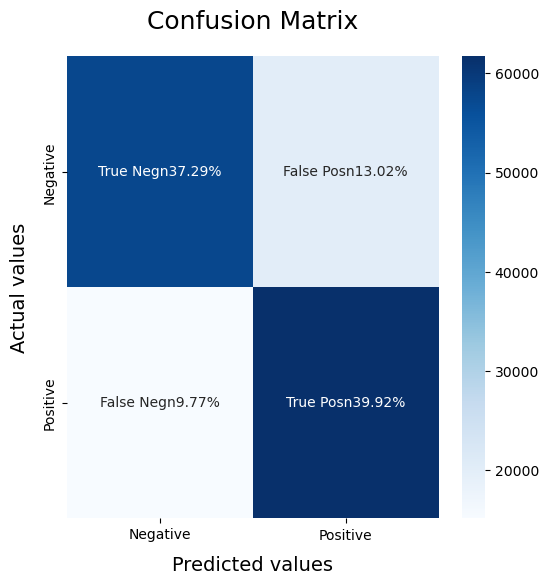

In [17]:
NBmodel = BernoulliNB()
NBmodel.fit(X_train, y_train)
model_Evaluate(NBmodel)

y_pred1 = NBmodel.predict(X_test)
track.loc['m1','accuracy'] = round(accuracy_score(y_test, y_pred1),2)

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79     77775
         1.0       0.78      0.81      0.80     76823

    accuracy                           0.79    154598
   macro avg       0.79      0.79      0.79    154598
weighted avg       0.79      0.79      0.79    154598



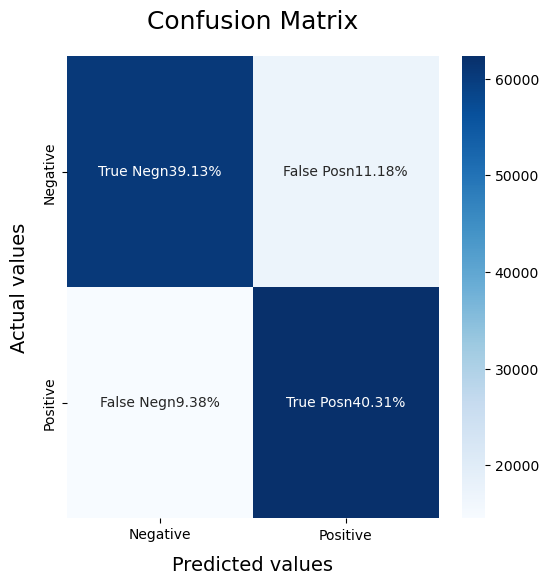

In [18]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

y_pred2 = SVCmodel.predict(X_test)
track.loc['m2','accuracy'] = round(accuracy_score(y_test, y_pred2),2)

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.79     77775
         1.0       0.79      0.81      0.80     76823

    accuracy                           0.80    154598
   macro avg       0.80      0.80      0.80    154598
weighted avg       0.80      0.80      0.80    154598



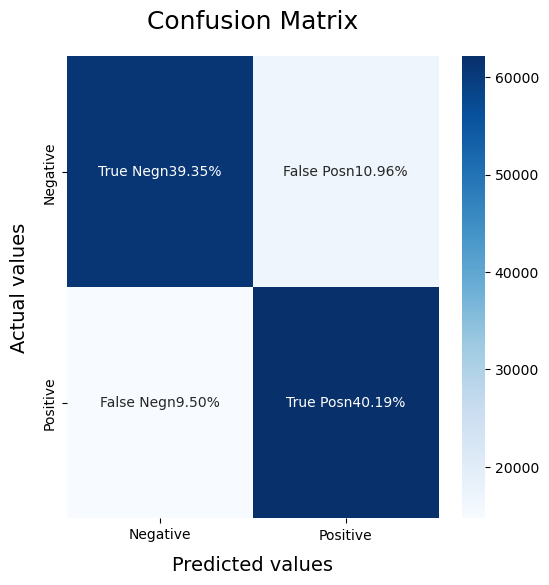

In [19]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

y_pred3 = LRmodel.predict(X_test)
track.loc['m3','accuracy'] = round(accuracy_score(y_test, y_pred3),2)

In [22]:
pickle.dump(LRmodel, open('Final_classifier/lrmodel.pkl', "wb"))

### Using some complicated models, so sample reduced

In [19]:
_ , X_train2, _, y_train2 = train_test_split(X_train, y_train, test_size= 0.05)

In [20]:
X_train

<1391373x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 12793061 stored elements in Compressed Sparse Row format>

In [21]:
X_train2

<69569x50000 sparse matrix of type '<class 'numpy.float64'>'
	with 640835 stored elements in Compressed Sparse Row format>

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.0s finished


              precision    recall  f1-score   support

         0.0       0.77      0.73      0.75     77775
         1.0       0.74      0.78      0.76     76823

    accuracy                           0.76    154598
   macro avg       0.76      0.76      0.76    154598
weighted avg       0.76      0.76      0.76    154598



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    7.1s finished


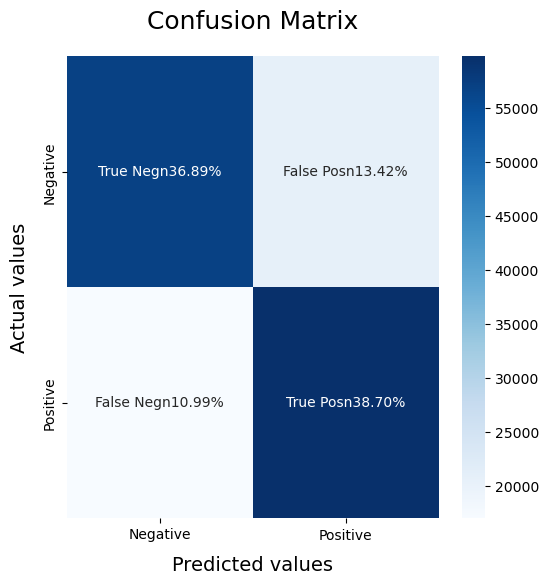

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150, criterion='entropy', max_depth=100, min_samples_split=2, 
        min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, 
        min_impurity_decrease=0.0, verbose=1)
rfc.fit(X_train2, y_train2)
model_Evaluate(rfc)

y_pred4 = rfc.predict(X_test)
track.loc['m4','accuracy'] = round(accuracy_score(y_test, y_pred4),2)

In [23]:
xgb_model = xgb.XGBClassifier()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [100],
              'min_child_weight': [1],
              'subsample': [0.5],
              'colsample_bytree': [0.45],
              'n_estimators': [150], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}


clf = GridSearchCV(xgb_model, parameters, n_jobs=5, cv=4, 
                scoring='accuracy', verbose=2, refit=False)

clf.fit(X_train2, y_train2)


Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.45], 'learning_rate': [0.05],
                         'max_depth': [100], 'min_child_weight': [1],
                         'missing': [-999], 'n_estimators': [150],
                         'nthread': [4], 'objective': ['binary:logistic'],
                         'seed': [1337], 'subsample': [0.5]},
             refit=False, scoring='accuracy', verbose=2)

In [24]:
clf.cv_results_['mean_test_score']

array([0.76396104])

In [25]:
track.loc['m5','accuracy'] = round(clf.cv_results_['mean_test_score'][0],2)

In [26]:
track

,model,accuracy
m1,Naive_Bayes,0.78
m2,Support Vector Classifier,0.80
m3,Logistic Regression,0.81
m4,Random Forest,0.76
m5,XGB,0.76


In [27]:
num_of_features

50000

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 10),verbose = True )
mlp.fit(X_train2, y_train2)


Iteration 1, loss = 0.52164984
Iteration 2, loss = 0.35784071
Iteration 3, loss = 0.27158462
Iteration 4, loss = 0.19657436
Iteration 5, loss = 0.13124825
Iteration 6, loss = 0.08045563
Iteration 7, loss = 0.05127699
Iteration 8, loss = 0.03690682
Iteration 9, loss = 0.02899505
Iteration 10, loss = 0.02443169
Iteration 11, loss = 0.02171159
Iteration 12, loss = 0.01887662
Iteration 13, loss = 0.01834968
[CV] END colsample_bytree=0.45, learning_rate=0.05, max_depth=100, min_child_weight=1, missing=-999, n_estimators=150, nthread=4, objective=binary:logistic, seed=1337, subsample=0.5; total time= 1.7min
[CV] END colsample_bytree=0.45, learning_rate=0.05, max_depth=100, min_child_weight=1, missing=-999, n_estimators=150, nthread=4, objective=binary:logistic, seed=1337, subsample=0.5; total time= 1.7min
[CV] END colsample_bytree=0.45, learning_rate=0.05, max_depth=100, min_child_weight=1, missing=-999, n_estimators=150, nthread=4, objective=binary:logistic, seed=1337, subsample=0.5; total 

In [ ]:
y_pred5 = mlp.predict(X_test)
print(classification_report(y_test, y_pred5))